# Milestones 1 


## Perkenalan

Nama : Aan Nurliyanah

Batch : 002

## Query



Query yang digunakan untuk mengambil dataset ini adalah :


SELECT 
limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 3986


Limit data menggunakan ketentuan batch dikali tahun lahir,
Batch 2 dan lahir tahun 1993, 2 x 1993 = 3986.

Dari hasil pengambilan data total baris yang didapatkan adalah sebanyak 2965 baris. Setelah dilakukan pengecekan terhadap jumlah baris secara keseluruhan dengan menggunakan pemanggilan select* terhadapa dataset sbb:

SELECT *
FROM `bigquery-public-data.ml_datasets.credit_card_default` 

Ternyata jumlah baris data secara keseluruhan hanya ada 2965 baris. 
Maka dari itu kita menggunakan dataset ini sebanyak data yang tersedia.


## Assignment Objective

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

## Problems

Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.

## Import Libraries 

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

Penggunaan library : 
- numpy, pandas, seaborn, matplotlib : untuk perhitungan data, pengolahan data, dan visualisasi data. 
- train_test_split : untuk memisahkan antara data train dan test 
- winsorizer : untuk handling outlier 
- DecisionTreeRegressor : untuk mencari feature selection 
- LogisticRegression, SVC,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,GaussianNB,AdaboostClassifier,BaggingClassifier : model yang digunakan.
- MinMaxScaler : untuk scaling numerical data
- accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix : untuk mengevalusi hasil model yang digunakan 
- cross_val_score : digunakna untuk mencari cross validation 
- GridSearchCV : untuk hyperparameter tuning

In [660]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


!pip install feature_engine
!pip install sklearn
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Loading and Overview

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Dataset ini diambil dari Google Cloud Platform di bagian bigquery-public-data. Dataset yang digunakan ml_datasets dari database bernama credit_card_default

Keterangan data :

- `limit_balance`   : Amount of given credit in NT dollars (includes individual and family/supplementary credit)        
- `sex` : Gender (1=male, 2=female)
- `education_level` : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)          
- `marital_status`  : Marital status (1=married, 2=single, 3=others)           
- `age` : Age in years            
- `pay_0`   : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)           
- `pay_2`   : Repayment status in August, 2005 (scale same as above) 
- `pay_3`   : Repayment status in July, 2005 (scale same as above)               
- `pay_4`   : Repayment status in June, 2005 (scale same as above)              
- `pay_5`   : Repayment status in May, 2005 (scale same as above)              
- `pay_6`   : Repayment status in April, 2005 (scale same as above)               
- `bill_amt_1`  : Amount of bill statement in September, 2005 (NT dollar)             
- `bill_amt_2`  : Amount of bill statement in August, 2005 (NT dollar)             
- `bill_amt_3`  : Amount of bill statement in July, 2005 (NT dollar)             
- `bill_amt_4`  : Amount of bill statement in June, 2005 (NT dollar)             
- `bill_amt_5`  : Amount of bill statement in May, 2005 (NT dollar)             
- `bill_amt_6`  : Amount of bill statement in April, 2005 (NT dollar)             
- `pay_amt_1`   : Amount of previous payment in September, 2005 (NT dollar)              
- `pay_amt_2`   : Amount of previous payment in August, 2005 (NT dollar)              
- `pay_amt_3`   : Amount of previous payment in July, 2005 (NT dollar)              
- `pay_amt_4`   : Amount of previous payment in June, 2005 (NT dollar)              
- `pay_amt_5`   : Amount of previous payment in May, 2005 (NT dollar)              
- `pay_amt_6`   : Amount of previous payment in April, 2005 (NT dollar)              
- `default_payment_next_month`  : Default payment (1=yes, 0=no)

Loading data dengan menggunakan pd.read_csv dan mendefinisikan jika terdapat values seperti '?',' ','99999','N/A' akan didefinisikan sebagai nan atau missing value, juga menggunakan parameter skipinitialspace untuk skip jika ada spasi di seluruh dataframe.

In [661]:
data = pd.read_csv('h8dsft_P1M1_Aan_Nurliyanah.csv', na_values=['?',' ','99999','N/A'],skipinitialspace=True)

Mengecek berapa banyak baris dan kolom pada dataset.

In [662]:
data.shape

(2965, 24)

Seperti yang sudah dipaparkan diawal jumlah baris data yang tersedia hanya ada 2965 data, jadi tidak sesuai dengan pengaturan limit awal pada query SQL yaitu sebesar 3986. Untuk jumlah kolom sebanyak 24 kolom.

Menggunakan fungsi set option untuk display max column karena jumlah nya cukup banyak yaitu 24 kolom. Agar kolom tertampil semua.

In [663]:
pd.set_option("display.max_columns",999)

Menampilkan dataset default 5 teratas dengan fungsi head

In [664]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0


Menampilkan data default 5 terbawah dengan menggunakan fungsi tail 

In [665]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,-2,0,0,0,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,-1,628,662,596,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,0,13429,14502,15564,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,0,42856,29248,17775,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,0,10886,11697,14479,10775,10998,12655,1300,3005,0,700,2000,1500,0


Melihat overview dari banyaknya baris dan kolom, dan jumlah baris di setiap kolom, nama kolom beserta tipe data nya. 

In [666]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Dari overview diatas didapatkan bahwa semua type data nya integer. Dan tidak ada missing value, jumlah baris 2965 terisi, berikutnya akan kita double cek lagi.

Pengecekan data duplikat

In [667]:
data[data.duplicated()].shape

(1, 24)

Terdapat 1 baris data duplikat yang nantinya akan kita drop di section data cleaning.

Selanjutnya mengecek missing value

In [668]:
data.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [669]:
data.isnull().sum().any()

False

Tidak terdapat missing value di dalam data set ini .

Karena semua data bertipe integer namun didalam nya terdapat kategori , maka kita akan membagi ke dalam kolom numerical dan kategorikal secara manual.

Melihat nama nama kolom yang ada di dataset

In [670]:
data.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

Mengecek overview dari keseluruhan data, melihat central tendency, q1,q2,q3, min max.

In [671]:
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Melihat jumlah value di seluruh dataset yang terisi di setiap kolom nya.

In [672]:
for i in data:
    print(i)
    print()
    print(data[i].value_counts())
    print('-' * 10)

limit_balance

50000     348
20000     203
200000    150
30000     148
80000     145
100000    123
150000    122
180000     97
210000     84
140000     83
120000     80
360000     78
70000      76
90000      71
260000     70
130000     69
230000     68
60000      68
300000     67
160000     62
240000     56
500000     56
110000     54
170000     52
280000     50
10000      46
220000     43
290000     37
320000     32
250000     28
310000     28
40000      26
400000     25
350000     24
420000     20
270000     19
380000     16
330000     16
390000     16
340000     15
190000     12
410000     12
450000      9
370000      8
490000      8
460000      8
470000      7
440000      6
480000      5
430000      5
510000      4
530000      3
700000      1
750000      1
780000      1
800000      1
560000      1
620000      1
680000      1
Name: limit_balance, dtype: int64
----------
sex

2    1802
1    1163
Name: sex, dtype: int64
----------
education_level

2    1400
1    1039
3     483
5      

Dari penjabaran diatas dilihat dari central tendency dan value_counts nya kita dapat Membagi data ke dalam variabel numerical dan categorical 

In [673]:
numerical = data[['limit_balance', 'age','bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']]

categorical = data[['sex', 'education_level', 'marital_status', 
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',  'default_payment_next_month']]



Melihat overview lebih detail lagi hanya di kolom numerical 

In [674]:
numerical.describe()

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,35.193255,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518
std,125030.415472,9.109439,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029
min,10000.000000,21.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000
50%,140000.000000,34.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000
75%,230000.000000,41.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000
max,800000.000000,69.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


Melihat overview unique data di kategorical

In [675]:
for i in categorical:
    print(i)
    print()
    print(categorical[i].unique())
    print('-' * 10)

sex

[1 2]
----------
education_level

[3 1 2 5 6 4 0]
----------
marital_status

[0 1 2 3]
----------
pay_0

[ 0 -2  2 -1  3  1  4  5  7  8  6]
----------
pay_2

[ 0 -2  2  3  4  6  1 -1  7  5]
----------
pay_3

[ 0 -2  2 -1  3  4  5  7  6]
----------
pay_4

[-1 -2  0  2  3  4  5  7  6  8]
----------
pay_5

[-1 -2  0  2  3  4  5  7  6]
----------
pay_6

[-1 -2  0  2  3  6  4  7]
----------
default_payment_next_month

[0 1]
----------


General overview 

- tidak terdapat missing value pada dataset 
- data duplikat hanya ada 1 baris, akan di drop di section data cleaning
- melihat overview kolom dibagi menjadi numerical dan categorical 


Numerical : 
1. limit_balance >> adalah limit kredit yang diberikan ke customer dalam NT dollars, limit paling kecil 10.000 dan paling besar nya 800.000.
2. age >> umur customer , umur dimulai dari 21 (usia available untuk pengajuan kredit) dan paling maksimal 69 tahun. 
3. bill_amt_1, s/d bill_amt_6 >> jumlah tagihan selama 6 bulan terakhir berurutan dari September, 2005 dalam bentuk (NT dollar). bill 1= september, 2=agustus,...6=april.
4. pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6 >> jumlah tagihan yang dibayarkan selama 6 bulan terakhir berurutan dari September, 2005 dalam bentuk (NT dollar), urutannya sama seperti bill ammount. 



Categorical : 
1. sex >> berisi data jenis kelamin (1= male, 2= female) selanjutnya akan kita rename menjadi (0=male, 1=female) untuk menyeragamkan data ordinal di seluruh kolom dimulai dari 0. 
2. education_level >> tingkatan pendidikan,(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). untuk kolom education_level jika dilihat dari unique nya terbagi menjadi 0 s/d 6, namun 0 tidak terdokumentasi di dalam penjabarannya. akan kita golongkan ke dalam kategori baru.
3. marital_status>>> status pernikahan (1=married, 2=single, 3=others),untuk kolom marital_status jika dilihat dari uniquenya terdapat 4 kategori yaitu 0,1,2,3. 0 tidak terdokumentasi di dalam penjabarannya. akan kita golongkan ulang kedalam kategori baru
4. pay_0	pay_2	pay_3	pay_4	pay_5	pay_6 >> Status pembayaran selama 6 bulan terakhir mulai dr September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above). untuk pay_0 seharusnya diganti dengan pay_1 berdasarkan urutan payment nya. kemudian kategori 0 dan-2 tidak terdokumentasikan juga penjabarannya. nilainya -2 s/d 9 seharusnya. akan kita golongkan ke dalam kategori baru.
5. default_payment_next_month >> Default payment (1=yes, 0=no), asumsinya bahwa default payment =1 adalah customer benar-benar menunggak pembayaran kartu kredit sehingga wajib membayar, untuk default payment =0 , customer tidak menunggak dan tidak wajib bayar. 


 




## Data Cleaning

Bagian ini berisi proses pembersihan data dari missing value atau kolom yang tidak digunakan

Membuat variabel baru dengan nama data_clean agar data asli tetap utuh.

In [676]:
data_clean = data.copy()

mengecek lagi data duplikat di dalam dataset

In [677]:
data_clean[data_clean.duplicated()].shape

(1, 24)

terdapat 1 data duplikat di dalam dataset, selanjutnya akan kita hapus.

In [678]:
data_clean.drop_duplicates(inplace=True)
data_clean[data_clean.duplicated()].shape

(0, 24)

Selanjutnya akan kita pastikan tidak ada missing value, kita akan menghapus jika ada, menggunakan fungsi dropna perbaris. 

In [679]:
data_clean.dropna(axis=0, inplace=True)

In [680]:
data_clean.shape

(2964, 24)

Dari total sebelumnya 2965, sekarang dataset total barisnya menjadi 2964 baris, dan 24 kolom. Selanjutnya akan mengganti nama nama kolom.

In [681]:
data_clean.rename(columns={'pay_0':'pay_1'},inplace=True)

In [682]:
data_clean.rename(columns={'default_payment_next_month':'default_pay'},inplace=True)

Kolom pay_0 diganti dengan pay_1 untuk memudahkan penamaan dan berdasarkan pada urutan pay, dan kolom default_payment_next_month diganti dengan default_pay. 

sex : 


Selanjutnya mengganti nilai pada kolom sex dimana 1= male, 2= female digantikan dengan 0=male, 1= female

In [683]:
data_clean.sex.value_counts()

2    1801
1    1163
Name: sex, dtype: int64

In [684]:
data_clean.sex.replace({1: 0, 2: 1}, inplace=True)
data_clean.sex.value_counts()

1    1801
0    1163
Name: sex, dtype: int64

education_level:

untuk education_level yang semula kategorinya terdiri dari : 
- 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, kita golongkan menjadi :
- 0=other,1=graduate school, 2=university, 3=high school dimana nilai 4,5,6 masuk ke dalam golongan 0.

In [685]:
data_clean.education_level.value_counts()

2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

In [686]:
data_clean.education_level.replace({4: 0, 5: 0, 6:0}, inplace=True)
data_clean.education_level.value_counts()

2    1400
1    1038
3     483
0      43
Name: education_level, dtype: int64

marital_status:

untuk marital_status yang sebelumnya 
- 1=married, 2=single, 3=others akan kita golongkan menjadi : 
- 0=others,1=married, 2=single, dimana golongan 3 dirubag menjadi 0.

In [687]:
data_clean.marital_status.value_counts()

2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64

In [688]:
data_clean.marital_status.replace({3: 0}, inplace=True)
data_clean.marital_status.value_counts()

2    1594
1    1331
0      39
Name: marital_status, dtype: int64

pay_1 ... pay_6 :

Untuk kolom pay_1 sampai pay_6, dimana sebelumnya 
- -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above, akan kita golongkan menjadi :
- 5 golongan yaitu 0=pay dully, 1=delay 1 month, 2=delay 2month, 3=delay 3 month, 4=delay over 3 month. jadi golongan 4,5,6,7,8 masuk ke golongan 4. Untuk golongan -1,-2 akan bergabung dengan 0. 

In [689]:
data_clean.pay_1.value_counts()

 0    1516
-1     540
 1     355
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_1, dtype: int64

In [690]:
change1 = (data_clean.pay_1== 4) | (data_clean.pay_1==5) | (data_clean.pay_1==6) | (data_clean.pay_1==7) | (data_clean.pay_1==8)
data_clean.loc[change1,'pay_1']=4
data_clean.pay_1.value_counts()

 0    1516
-1     540
 1     355
 2     262
-2     247
 3      29
 4      15
Name: pay_1, dtype: int64

In [691]:
change2 = (data_clean.pay_1== -1) | (data_clean.pay_1== -2) 
data_clean.loc[change2,'pay_1']=0
data_clean.pay_1.value_counts()

0    2303
1     355
2     262
3      29
4      15
Name: pay_1, dtype: int64

pay_2

In [692]:
data_clean.pay_2.value_counts()

 0    1607
-1     580
 2     374
-2     352
 3      32
 4       8
 1       4
 7       3
 6       2
 5       2
Name: pay_2, dtype: int64

In [693]:
change1 = (data_clean.pay_2== 4) | (data_clean.pay_2==5) | (data_clean.pay_2==6) | (data_clean.pay_2==7)
data_clean.loc[change1,'pay_2']=4


In [694]:
change2 = (data_clean.pay_2== -1) | (data_clean.pay_2== -2) 
data_clean.loc[change2,'pay_2']=0
data_clean.pay_2.value_counts()

0    2539
2     374
3      32
4      15
1       4
Name: pay_2, dtype: int64

pay_3

In [695]:
data_clean.pay_3.value_counts()

 0    1610
-1     580
 2     368
-2     366
 3      22
 4       8
 6       4
 5       3
 7       3
Name: pay_3, dtype: int64

In [696]:
change1 = (data_clean.pay_3== 4) | (data_clean.pay_3==5) | (data_clean.pay_3==6) | (data_clean.pay_3==7)
data_clean.loc[change1,'pay_3']=4

In [697]:
change2 = (data_clean.pay_3== -1) | (data_clean.pay_3== -2) 
data_clean.loc[change2,'pay_3']=0
data_clean.pay_3.value_counts()

0    2556
2     368
3      22
4      18
Name: pay_3, dtype: int64

pay_4

In [698]:
data_clean.pay_4.value_counts()


 0    1667
-1     532
-2     407
 2     324
 3      14
 4       7
 7       6
 5       5
 6       1
 8       1
Name: pay_4, dtype: int64

In [699]:
change1 = (data_clean.pay_4== 4) | (data_clean.pay_4==5) | (data_clean.pay_4==6) | (data_clean.pay_4==7) | (data_clean.pay_4==8)
data_clean.loc[change1,'pay_4']=4

In [700]:
change2 = (data_clean.pay_4== -1) | (data_clean.pay_4== -2) 
data_clean.loc[change2,'pay_4']=0
data_clean.pay_4.value_counts()

0    2606
2     324
4      20
3      14
Name: pay_4, dtype: int64

pay_5

In [701]:
data_clean.pay_5.value_counts()

 0    1702
-1     504
-2     440
 2     280
 3      19
 4       9
 7       7
 5       2
 6       1
Name: pay_5, dtype: int64

In [702]:
change1 = (data_clean.pay_5== 4) | (data_clean.pay_5==5) | (data_clean.pay_5==6) | (data_clean.pay_5==7)
data_clean.loc[change1,'pay_5']=4

In [703]:
change2 = (data_clean.pay_5== -1) | (data_clean.pay_5== -2) 
data_clean.loc[change2,'pay_5']=0
data_clean.pay_5.value_counts()

0    2646
2     280
3      19
4      19
Name: pay_5, dtype: int64

pay_6

In [704]:
data_clean.pay_6.value_counts()

 0    1626
-1     540
-2     469
 2     297
 3      21
 7       6
 6       3
 4       2
Name: pay_6, dtype: int64

In [705]:
change1 = (data_clean.pay_6== 4) | (data_clean.pay_6==5) | (data_clean.pay_6==6) | (data_clean.pay_6==7) 
data_clean.loc[change1,'pay_6']=4

In [706]:
change2 = (data_clean.pay_6== -1) | (data_clean.pay_6== -2) 
data_clean.loc[change2,'pay_6']=0
data_clean.pay_6.value_counts()

0    2635
2     297
3      21
4      11
Name: pay_6, dtype: int64

In [707]:
data_clean.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,50000,0,3,0,50,0,0,0,0,0,0,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,1,3,0,45,0,0,0,0,0,0,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0


Dalam section data cleaning 

- menghapus duplikat data 
- menghapus misisng value (jika ada)
- mengganti nama kolom pay_0 dengan pay_1
- mengganti nama kolom default_payment_next_month dengan default_pay
- mengganti nilai pada kolom sex. 
- mengkategorikan ulang kategori yang belum dideskripsikan di dataset default, dalam kolom education_level, marital_status, pay_1 s/d pay_6. 

Data sudah siap digunakan untuk analisis selanjutnya. 

## Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### EDA for Analysis

Melakukan visualisasi pada kolom default_pay 

In [708]:
data_clean.default_pay.value_counts()

0    2329
1     635
Name: default_pay, dtype: int64

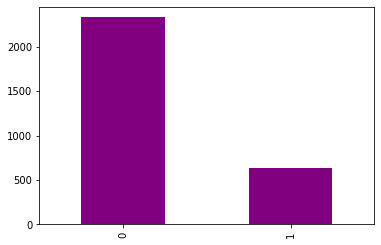

In [709]:
data_clean['default_pay'].value_counts().plot(kind='bar',color='purple')

In [710]:
2329/2964*100

78.57624831309042

In [711]:
635/2964*100

21.423751686909583

dari visualisasi diatas didapatkan bahwa jumlah customer yang tidak default_payment lebih banyak yaitu sebesar 78.58 % dari pada yang default_payment sejumlah 21.42 %. Artinya banyak klien tidak wajib melakukan pembayaran di bulan depan. Jika dilihat dari presentase banyakya data, bisa dikatakan data cukup imbalance.

Melihat visualisasi pada kolom sex terhadap default_pay

In [712]:
data_clean.sex.value_counts()

1    1801
0    1163
Name: sex, dtype: int64

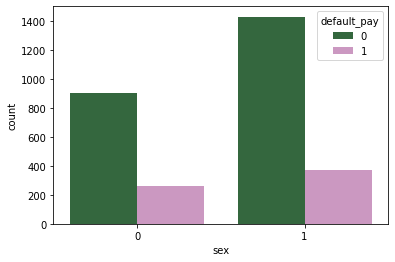

In [713]:
sns.countplot(data=data_clean,x='sex',hue='default_pay',palette="cubehelix")

Dari visualisai diatas didaptkan bahwa jumlah pemegang kartu kredit lebih banyak perempuan dibandingkan laki laki. Untuk kewajiban membayar di bulan depan dilihat dari keduanya lebih banyak perempuan. Begitupun dengan tidak wajib bayar didominasi perempuan.

Selanjutnya melihat visualisasi pada kolom age

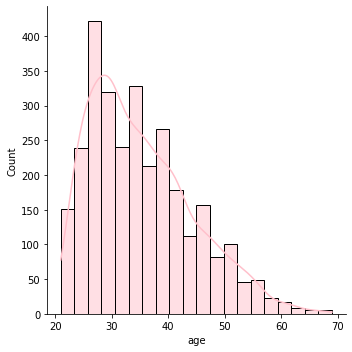

In [714]:
sns.displot(data_clean['age'],kde=True,color='pink',bins=20)

Dari visualisasi diatas didapatkan bahwa sejumlah besar customer yang berusia antara 25 hingga 40 tahun.

Selanjutnya melihat tingkat pendidikan pada kolom education_level terhadap default_pay

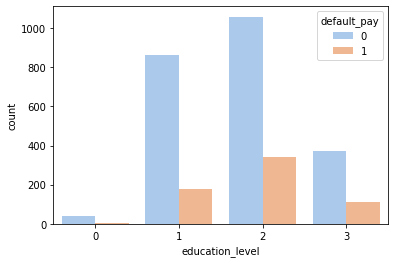

In [715]:
sns.countplot(data=data_clean,x='education_level',hue='default_pay',palette="pastel")

Dari visualisasi diatas didaptkan bahwa jumlah customer yang wajib dan tidak wajib melakukan pembayaran ada di level pendidikan kategori 2 yaitu university.

Melihat visualisasi limit_balance terhadap default_pay

In [716]:
data_clean.limit_balance.mode()

0    50000
dtype: int64

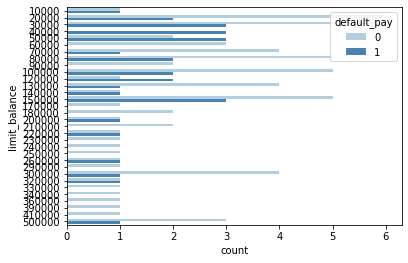

In [717]:
sns.countplot(data=data_clean.sample(100),y='limit_balance',hue='default_pay',palette="Blues")

Dari visualisasi diatas didaptkan bahwa dari 100 sampel tingkat tertinggi customer yang tidak wajib melakukan pembayaran di bulan depan adalah yang mempunyai limit kredit 50000, bisa dilihat juga dari nilai modus nya yaitu nilai limit_balance yang sering keluar diangka 50000.  

Melihat visualisasi marital status terhadap default_pay

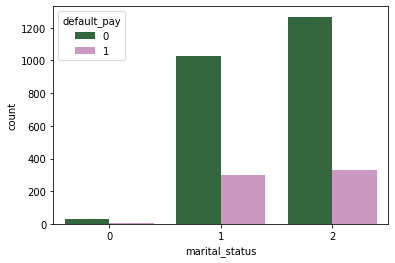

In [718]:
 sns.countplot(data=data_clean,x='marital_status',hue='default_pay',palette="cubehelix")

dari visualisasi diatas didapatkan bahwa data terbanyak adalah pada kategori marital status 2 yaitu single. Pada kategori ini lebih banyak customer yang tidak wajib melakukan pambayara di bulan depan. 

Melihat visualisasi antara pay_1 terhadap default_pay

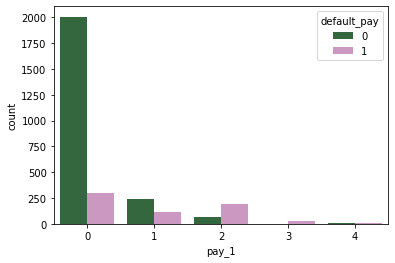

In [719]:
 sns.countplot(data=data_clean,x='pay_1',hue='default_pay',palette="cubehelix")

Terlihat bahwa customer yang membayar tepat waktu / pay duly dengan kategori 0 lebih banyak diprediksi sebagai customer yang tidak wajib melakukan pembayaran, karena memang mereka bisa jadi tidak mempunyai tunggakan dan membayar sewajarnya. 

### Split Data into Inference, Train, Test

Memisahkan data untuk model inference sebanyak 5 data dengan random_state sebesar 15.

In [720]:
#data untuk model inference
data_inf = data_clean.sample(5,random_state=15)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
2630,140000,1,2,1,48,0,0,0,0,0,0,41241,42548,44552,46503,48418,49277,1996,3000,3000,3000,1790,1965,0
455,50000,0,2,1,32,1,0,0,0,0,0,-11545,-1935,7321,2850,6340,3110,10000,10000,7867,6340,3000,2218,0
869,10000,1,1,2,24,0,0,0,0,0,0,6709,7895,8751,8925,9111,9360,1300,1146,320,330,400,1000,0
361,210000,1,2,1,37,0,0,0,0,0,0,22908,32513,6192,2885,8419,2810,32513,9,8,8444,3118,0,1
1894,70000,1,1,2,25,0,0,2,2,2,0,37017,39980,39063,41592,39101,40310,3900,0,3500,0,2000,1813,1


In [721]:
# Menghapus Inference-Set dari Dataset

data_train_test = data_clean.drop(data_inf.index)
data_train_test.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,50000,0,3,0,50,0,0,0,0,0,0,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,1,3,0,45,0,0,0,0,0,0,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0


In [722]:
# Reset Index 

data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,140000,1,2,1,48,0,0,0,0,0,0,41241,42548,44552,46503,48418,49277,1996,3000,3000,3000,1790,1965,0
1,50000,0,2,1,32,1,0,0,0,0,0,-11545,-1935,7321,2850,6340,3110,10000,10000,7867,6340,3000,2218,0
2,10000,1,1,2,24,0,0,0,0,0,0,6709,7895,8751,8925,9111,9360,1300,1146,320,330,400,1000,0
3,210000,1,2,1,37,0,0,0,0,0,0,22908,32513,6192,2885,8419,2810,32513,9,8,8444,3118,0,1
4,70000,1,1,2,25,0,0,2,2,2,0,37017,39980,39063,41592,39101,40310,3900,0,3500,0,2000,1813,1


Split data kedalam x dan y sebagai fitur dan target yang akan digunakan sebagai target adalah default_pay dan sisanya adalah feature, data dibagi kedalan x train, y train, xtest dan y test

In [723]:
# define feature and target
X = data_train_test.drop('default_pay', axis=1)
y = data_train_test['default_pay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2071, 23)
(888, 23)
(2071,)
(888,)


Menggabungkan xtrain dan ytrain untuk modelling

In [724]:
# for EDA model 
data_eda = pd.concat([X_train, y_train], axis=1)

data_eda.shape

(2071, 24)

### EDA for Modeling

Memisahkan data antara numerical dan kategorical

In [725]:
eda_num = data_eda[['limit_balance', 'age','bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']].columns.tolist()

eda_cat = data_eda[['sex', 'education_level', 'marital_status', 
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',  'default_pay']].columns.tolist()

#### Numerical Features

Melihat berapa nilai skew dari kolom numerical

In [726]:
skew = data_eda[eda_num].skew()
nilai_skew = pd.DataFrame(skew)
nilai_skew.columns =['distribusi']

nilai_skew

,distribusi
limit_balance,0.986430
age,0.764247
bill_amt_1,2.535231
bill_amt_2,2.427362
bill_amt_3,2.484343
bill_amt_4,2.385296
bill_amt_5,2.311715
bill_amt_6,2.384177
pay_amt_1,9.250252
pay_amt_2,17.320083


Mari kita lihat lebih lanjut dengan menyeleksi apakah termasuk distribusi normal atau tidak normal. 

In [727]:
nilai_skew['skew']=0
for i in nilai_skew.index:
  if (nilai_skew["distribusi"][i]>= -0.5) & (nilai_skew["distribusi"][i] <= 0.5):
    nilai_skew['skew'][i]='distribusi normal'
  else:
    nilai_skew['skew'][i]='distribusi tidak normal'
nilai_skew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,distribusi,skew
limit_balance,0.986430,distribusi tidak normal
age,0.764247,distribusi tidak normal
bill_amt_1,2.535231,distribusi tidak normal
bill_amt_2,2.427362,distribusi tidak normal
bill_amt_3,2.484343,distribusi tidak normal
bill_amt_4,2.385296,distribusi tidak normal
bill_amt_5,2.311715,distribusi tidak normal
bill_amt_6,2.384177,distribusi tidak normal
pay_amt_1,9.250252,distribusi tidak normal
pay_amt_2,17.320083,distribusi tidak normal


Ternyata di kolom numerical ini semuanya mempunyai distribusi tidak normal dengan nilai terbanyak high skew diatas 1. Selanjutnya kita akan lihat visualisainya.

In [728]:
# new variable for plot purpose
numerical = data_eda[eda_num]

In [729]:
def diagnostic_plots(numerical, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numerical[variable])
    plt.title('Boxplot')

    plt.show()

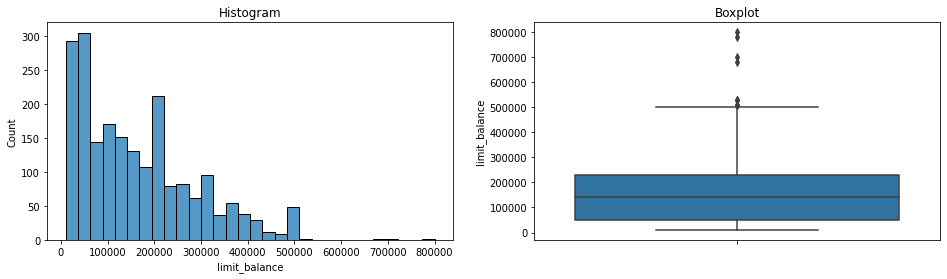

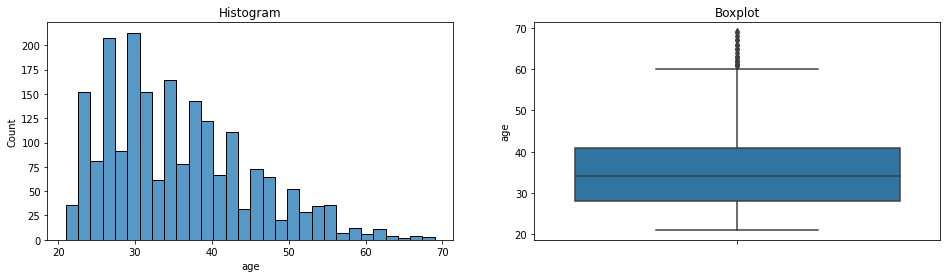

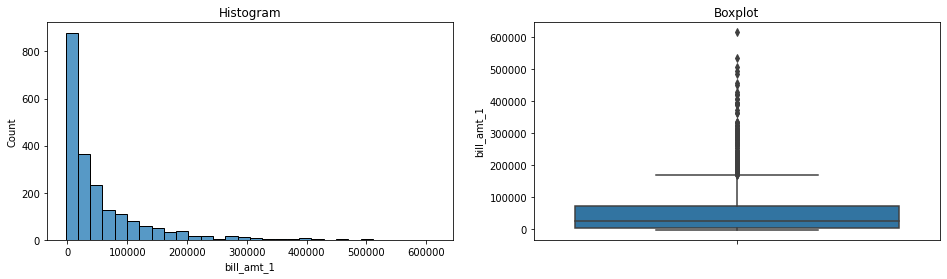

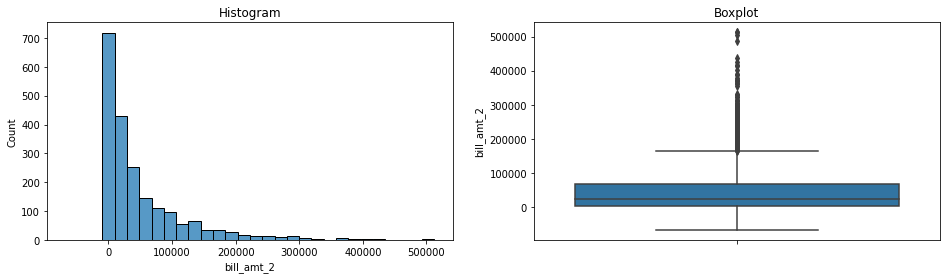

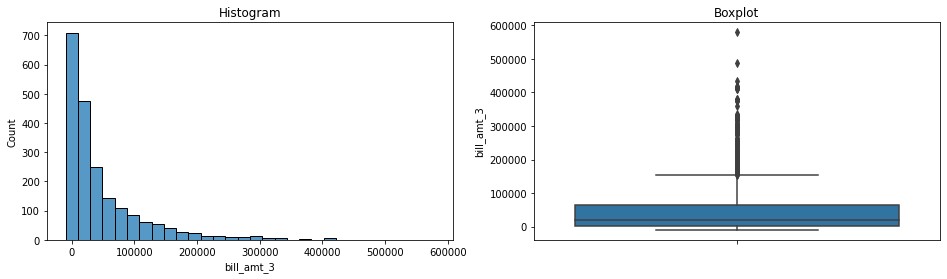

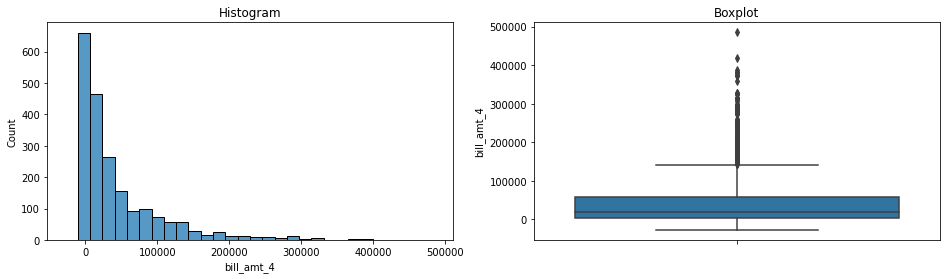

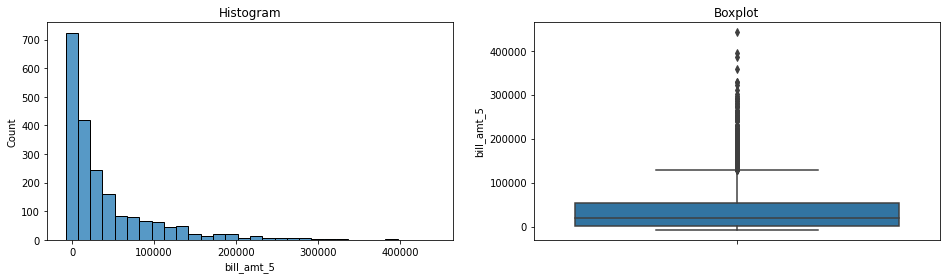

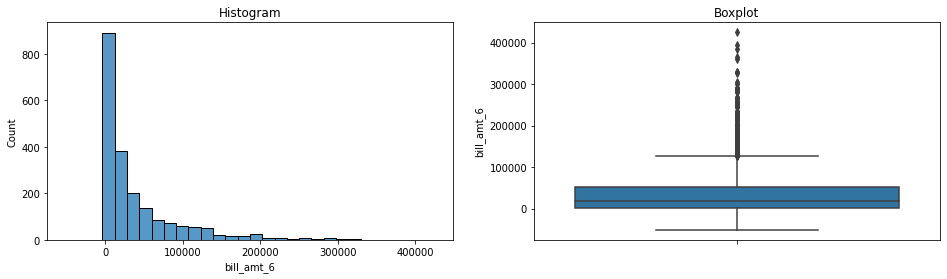

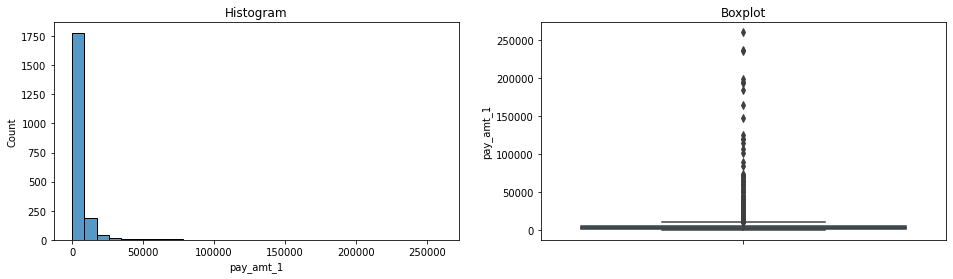

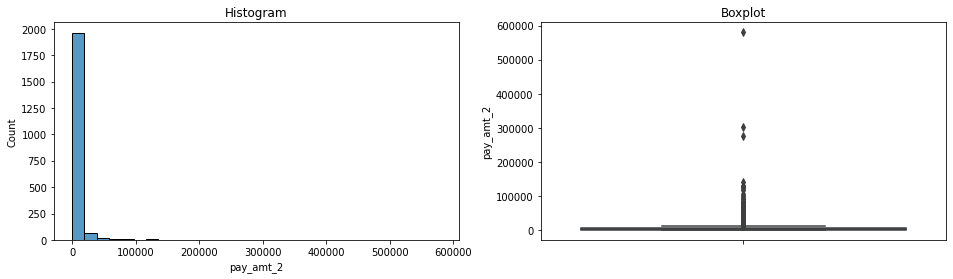

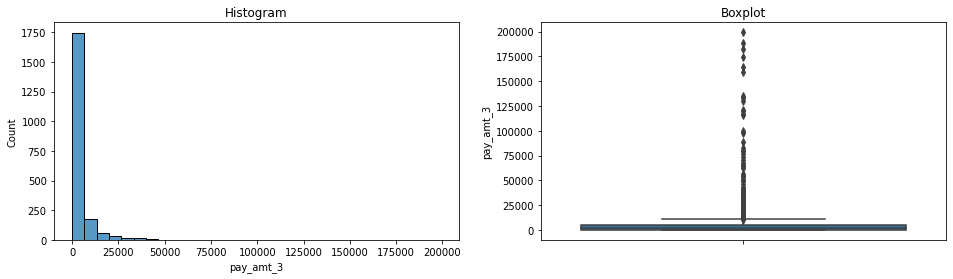

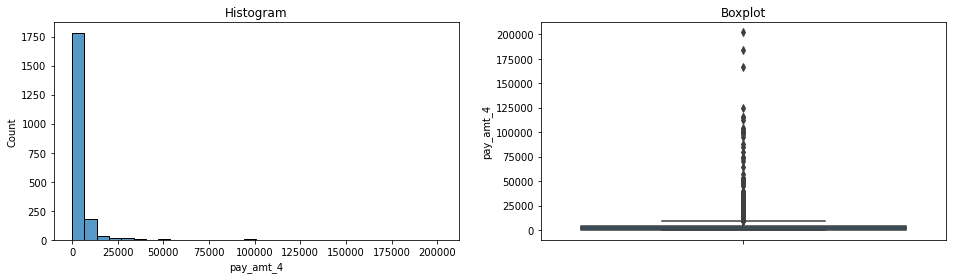

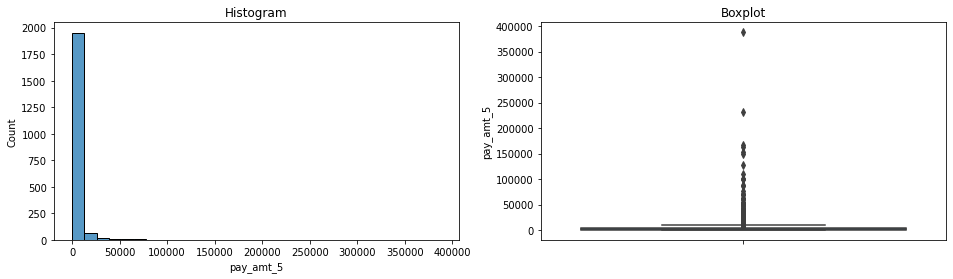

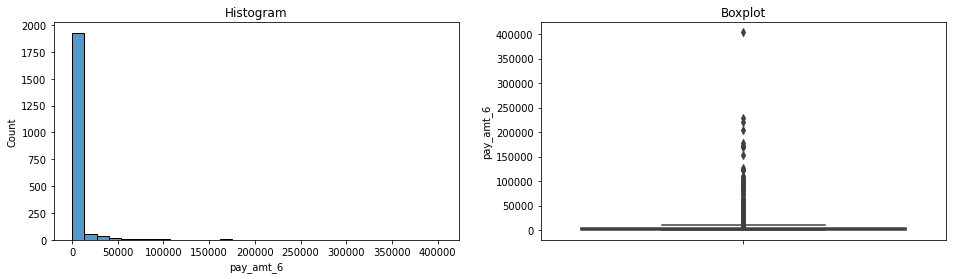

In [730]:
diagnostic_plots(numerical, 'limit_balance')
diagnostic_plots(numerical, 'age')
diagnostic_plots(numerical, 'bill_amt_1')
diagnostic_plots(numerical, 'bill_amt_2')
diagnostic_plots(numerical, 'bill_amt_3')
diagnostic_plots(numerical, 'bill_amt_4')
diagnostic_plots(numerical, 'bill_amt_5')
diagnostic_plots(numerical, 'bill_amt_6')
diagnostic_plots(numerical, 'pay_amt_1')
diagnostic_plots(numerical, 'pay_amt_2')
diagnostic_plots(numerical, 'pay_amt_3')
diagnostic_plots(numerical, 'pay_amt_4')
diagnostic_plots(numerical, 'pay_amt_5')
diagnostic_plots(numerical, 'pay_amt_6')


Terlihat dari semua kolom semuanya mempunyai right skew yang cukup besar,dan memiliki outlier. namun kita akan mengesampingkan age,kolom bill_amt dan pay_amt, dengan asumsi karena berkaitan dengan jumlah tagihan maka datanya harus tetap pada aslinya sesuai dengan jumlah tagihan sebenarnya. Untuk kolom age karena umur customer juga harus tetap real, tidak bisa di capping ke umur lain. jadi outlier tidak akan di handling di kolom kolom ini. 

Kita hanya akan handling outlier untuk limit_balance saja. 

In [731]:
# outlier detection using IQR 
Q3 = data_eda['limit_balance'].quantile(.75)
Q1 = data_eda['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = data_eda[(data_eda['limit_balance'] > upper) | (data_eda['limit_balance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent limit_balance of outlier: ', outlier.shape[0]/data_eda.shape[0] * 100, '%')

count of outlier:  8
percent limit_balance of outlier:  0.386286817962337 %


Kita akan melakukan capping dengan metode iqr dan nilai fold 1.5 dengan pertimbangan bahwa kolom ini mempunyai distribusi tidak normal.

In [732]:
# capping outlier 
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, 
variables=['limit_balance'])

data_eda_capping = wins.fit_transform(data_eda)

In [733]:
# Compare before and after outlier handling
print('before handling: \n', data_eda.limit_balance.describe())
print('after handling: \n', data_eda_capping.limit_balance.describe())


before handling: 
 count      2071.000000
mean     163070.980203
std      125004.866699
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      800000.000000
Name: limit_balance, dtype: float64
after handling: 
 count      2071.000000
mean     162568.807339
std      123167.012698
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      500000.000000
Name: limit_balance, dtype: float64


Data numerical sudah selesai di capping. 

#### Categorical Features

In [734]:
df_cat = data_eda[eda_cat]

df_cat.head()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_pay
1363,1,1,2,0,0,0,0,0,0,0
484,1,1,1,0,0,0,0,0,0,0
2916,1,1,2,0,0,0,0,0,0,0
2419,1,1,2,0,0,0,0,0,0,1
445,0,2,1,0,0,0,0,0,0,0


In [735]:
df_cat.describe()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_pay
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000
mean,0.606953,1.801545,1.517141,0.350072,0.304201,0.294061,0.273298,0.240464,0.246741,0.213906
std,0.488545,0.726129,0.520656,0.728707,0.762767,0.756906,0.732712,0.706166,0.702279,0.410161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


Untuk kolom categorical sudah ordinal dan berurutan semua nilainya, maka dari itu tidak dibutuhkan encoder lagi. Data sudah siap digunakan.

#### Combine Numerical and Categorical

In [736]:
data_eda_capping.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
1363,500000.0,1,1,2,35,0,0,0,0,0,0,22369,14100,24754,21443,13892,11241,14128,24902,21479,11465,11356,66710,0
484,100000.0,1,1,1,36,0,0,0,0,0,0,16155,3514,3400,15156,13920,2099,3514,3400,15156,13920,2099,15638,0


In [737]:
data_model= pd.concat([data_eda_capping.reset_index(drop=True)], axis=1)

In [738]:
data_model.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,500000.0,1,1,2,35,0,0,0,0,0,0,22369,14100,24754,21443,13892,11241,14128,24902,21479,11465,11356,66710,0
1,100000.0,1,1,1,36,0,0,0,0,0,0,16155,3514,3400,15156,13920,2099,3514,3400,15156,13920,2099,15638,0
2,20000.0,1,1,2,23,0,0,0,0,0,0,17849,15356,17146,16319,15687,16948,2000,2080,2000,600,1500,1000,0
3,50000.0,1,1,2,25,0,0,0,0,0,0,42056,46024,45452,45450,41154,39034,5000,2000,1500,2000,4000,1364,1
4,500000.0,0,2,1,54,0,0,0,0,0,0,-30,-420,390,390,166210,129716,0,1200,390,166210,6000,3000,0


Data sudah di combine antara numerical dan kategorikal. Selanjutnya masuk ke feature selection. 

#### Feature Selection

Untuk feature selection akan digunakan feature importans dari Decission Tree model . 

In [739]:
# memisahkan x dan y 
X_select = data_model.drop('default_pay',axis=1).copy()
y_select = data_model['default_pay']

Feature: 0, Score: 0.09
Feature: 1, Score: 0.01
Feature: 2, Score: 0.02
Feature: 3, Score: 0.01
Feature: 4, Score: 0.06
Feature: 5, Score: 0.22
Feature: 6, Score: 0.02
Feature: 7, Score: 0.02
Feature: 8, Score: 0.01
Feature: 9, Score: 0.01
Feature: 10, Score: 0.01
Feature: 11, Score: 0.05
Feature: 12, Score: 0.06
Feature: 13, Score: 0.03
Feature: 14, Score: 0.02
Feature: 15, Score: 0.03
Feature: 16, Score: 0.04
Feature: 17, Score: 0.03
Feature: 18, Score: 0.04
Feature: 19, Score: 0.05
Feature: 20, Score: 0.03
Feature: 21, Score: 0.05
Feature: 22, Score: 0.08


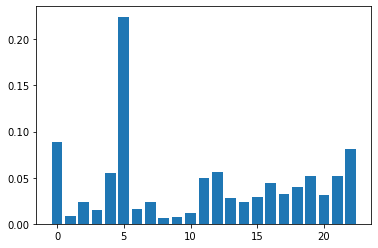

In [740]:
X, y = X_select, y_select
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature selection yang didapatkan dari metode ini untuk nilai diatas 0,7 hanya ada 2 feature yaitu limit_balance dan pay_1. Mari kita bandingkan dengan menggunakna metode lain yaitu heatmap correlation.

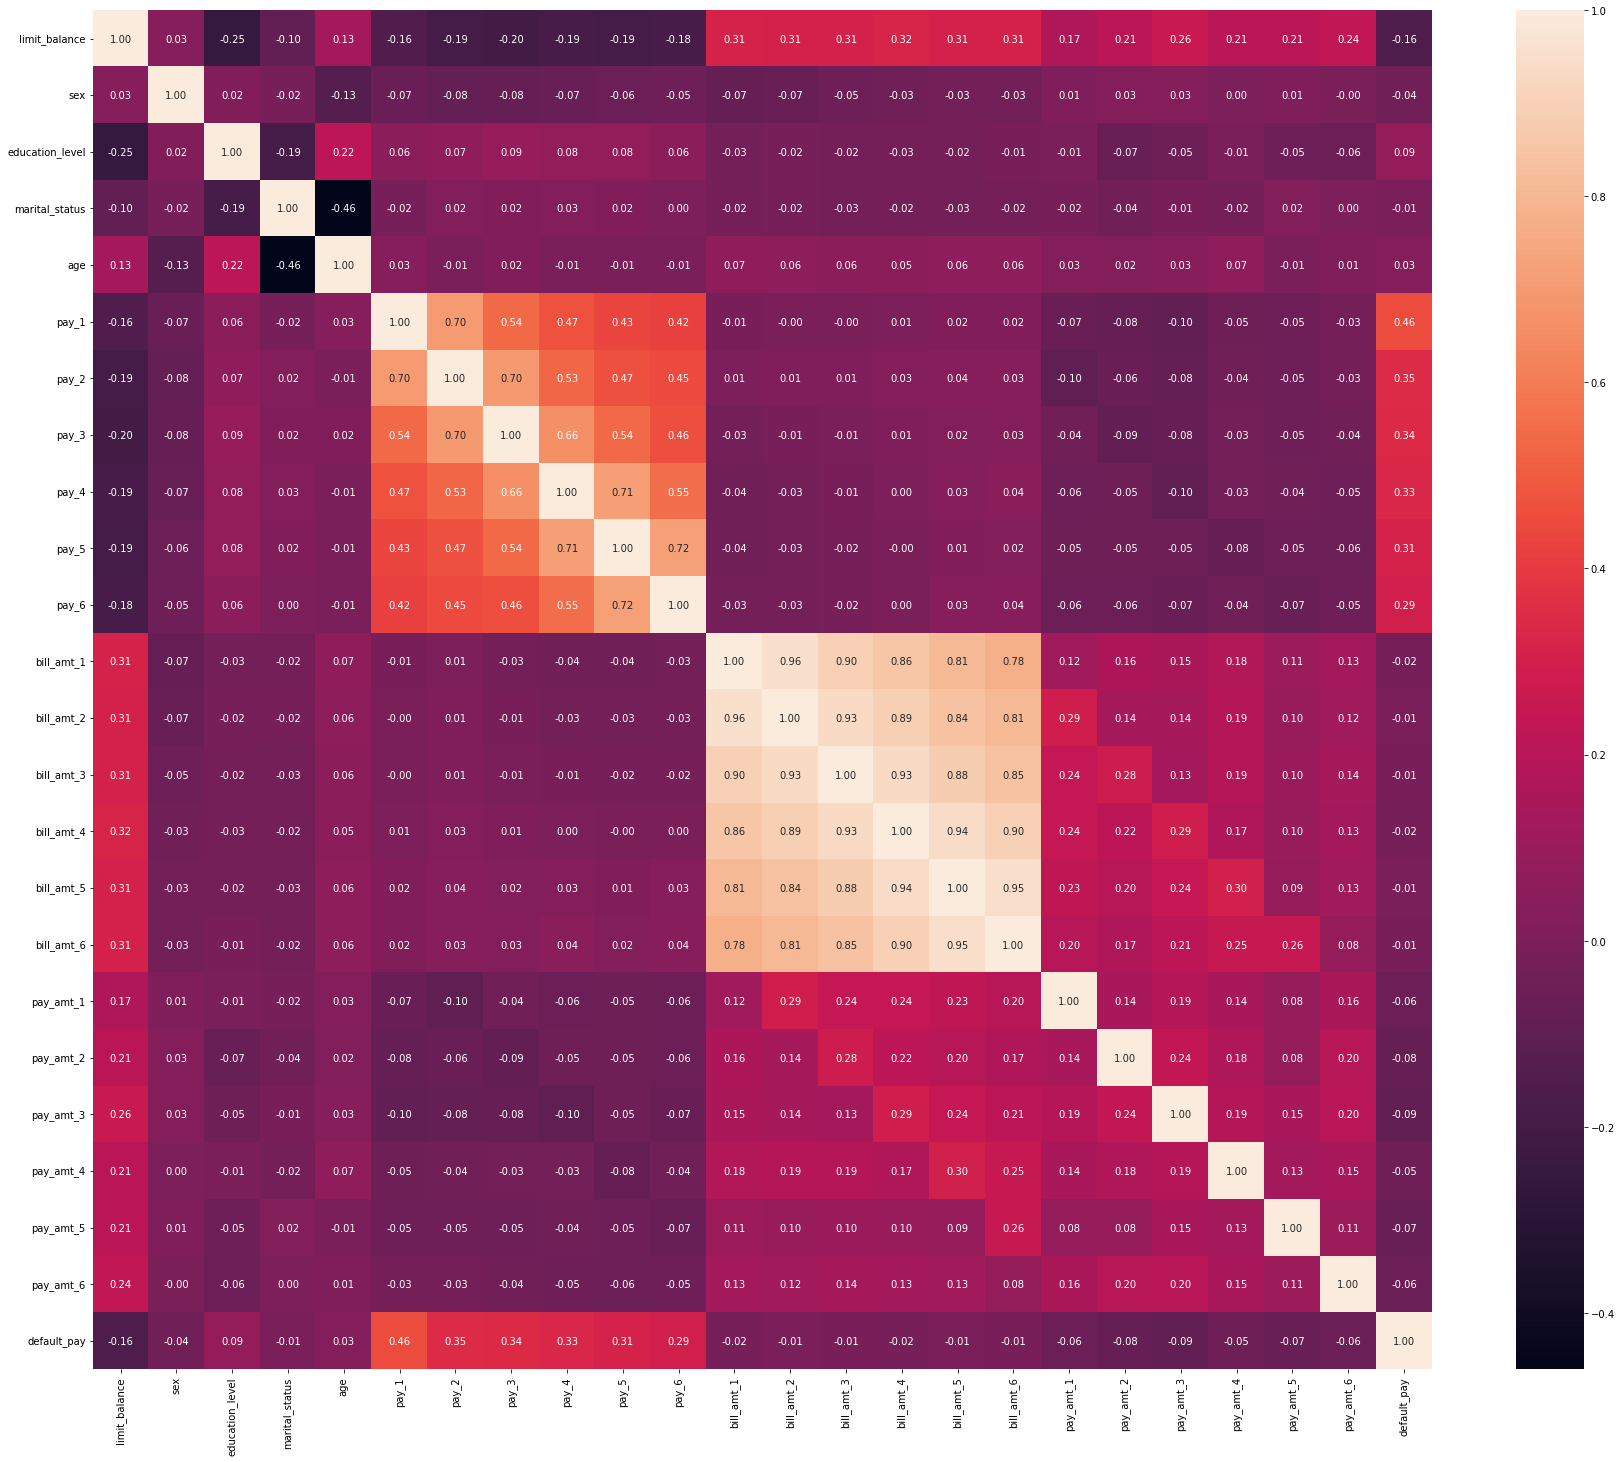

In [741]:
plt.figure(figsize=(30,25))
sns.heatmap(data_model.corr(), annot=True, fmt='.2f')
plt.show()

Dari metode ini kita dapatkan 6 feature terpilih yang mempunyai korelasi dengan default_pay (target) dengan nilai diatas 0.1. diantaranya adalah : 'limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6'. Selanjuntya dengan mengkombinasikan pilihan feature menggunakan decission tree dan heatmap kita mendapatkan feature terpilih sbb .'limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6'


In [742]:
data_model[['limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_pay']]

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_pay
0,500000.0,0,0,0,0,0,0,0
1,100000.0,0,0,0,0,0,0,0
2,20000.0,0,0,0,0,0,0,0
3,50000.0,0,0,0,0,0,0,1
4,500000.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2066,50000.0,0,0,2,2,2,0,0
2067,20000.0,0,0,0,0,0,0,0
2068,200000.0,1,0,0,0,0,0,1
2069,140000.0,0,0,0,0,0,0,0


Feature yang sudah terpilih akan dilakukan scalling pada data numerical nya yaitu limit_balance.

In [743]:
# numerical scaling

num_col_scalling = ['limit_balance']
scaler = MinMaxScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(data_model[num_col_scalling]))
num_scaled.columns = num_col_scalling

data_model.drop(num_col_scalling, axis=1, inplace=True)
data_model_scall = pd.concat([data_model, num_scaled], axis=1)

data_model_scall = data_model_scall[['limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_pay']]

In [744]:
data_model_scall.head(2)

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_pay
0,1.000000,0,0,0,0,0,0,0
1,0.183673,0,0,0,0,0,0,0


Proses EDA sudah selesai , kita lanjutkan ke data preprocessing.

## Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan

Menggabungkan data test set ke dalam variabel testing.

In [745]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
1524,50000,1,2,2,30,0,0,0,0,0,0,4166,2859,1452,1190,543,920,2859,1452,1190,543,920,534,0
2106,10000,1,2,2,32,0,0,0,0,0,0,5250,1223,2264,3230,0,0,1223,1066,1032,0,0,0,1


capping data testing dengan winsorizer

In [746]:
testing = wins.transform(testing)
testing.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
1524,50000.0,1,2,2,30,0,0,0,0,0,0,4166,2859,1452,1190,543,920,2859,1452,1190,543,920,534,0
2106,10000.0,1,2,2,32,0,0,0,0,0,0,5250,1223,2264,3230,0,0,1223,1066,1032,0,0,0,1


Membagi data testing kedalam numerical dan categorical 

In [747]:
num1 = testing[['limit_balance', 'age','bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']].columns.tolist()
       
cat1 = testing[['sex', 'education_level', 'marital_status', 
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',  'default_pay']].columns.tolist()

In [748]:
testing_cat = testing[cat1]

testing_cat.head(2)

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_pay
1524,1,2,2,0,0,0,0,0,0,0
2106,1,2,2,0,0,0,0,0,0,1


Menggabungkan data e dalam variabel testing_mod

In [749]:
testing_mod = pd.concat([testing.reset_index(drop=True)], axis=1)
testing_mod.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,50000.0,1,2,2,30,0,0,0,0,0,0,4166,2859,1452,1190,543,920,2859,1452,1190,543,920,534,0
1,10000.0,1,2,2,32,0,0,0,0,0,0,5250,1223,2264,3230,0,0,1223,1066,1032,0,0,0,1
2,270000.0,1,1,2,31,0,0,0,0,0,0,167428,168827,148031,92943,94464,92899,6155,5382,3270,3377,3329,3553,1


Memilih feature 

In [750]:
testing_model = testing_mod[['limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_pay']]
testing_model.head(3)

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_pay
0,50000.0,0,0,0,0,0,0,0
1,10000.0,0,0,0,0,0,0,1
2,270000.0,0,0,0,0,0,0,1


Process scaling 

In [751]:
num_scaled_testing = pd.DataFrame(scaler.transform(testing_model[num_col_scalling]))
num_scaled_testing.columns = num_col_scalling

testing_model.drop(num_col_scalling, axis=1, inplace=True)
testing_model = pd.concat([testing_model, num_scaled_testing], axis=1)

testing_model = testing_model[['limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_pay']]
testing_model.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_pay
0,0.081633,0,0,0,0,0,0,0
1,0.000000,0,0,0,0,0,0,1


Membagi data kedalam train dan test

In [752]:
X_train = data_model_scall.drop('default_pay',axis=1).copy()
y_train = data_model_scall['default_pay']

X_test = testing_model.drop('default_pay',axis=1).copy()
y_test = testing_model['default_pay']

## Model Building

Model yang akan digunakan adalah : 
1. LogisticRegression
2. SVM
3. DecisionTreeClassifier
4. RandomForestClassifier
5. KNN
6. Naive Bayes 
7. AdaBoostClassifier
8. Bagging Classifier

In [753]:
logreg = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
adb = AdaBoostClassifier()
bag_clf = BaggingClassifier(DecisionTreeClassifier())


Model training dengan menggunakan parameter default (baseline model) dari setiap algoritma. 

## Model Evaluation

### LogisticRegression

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1628
           1       0.73      0.40      0.51       443

    accuracy                           0.84      2071
   macro avg       0.79      0.68      0.71      2071
weighted avg       0.83      0.84      0.82      2071

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       698
           1       0.68      0.36      0.47       190

    accuracy                           0.83       888
   macro avg       0.76      0.66      0.69       888
weighted avg       0.81      0.83      0.81       888

Confusion Matrix      : 


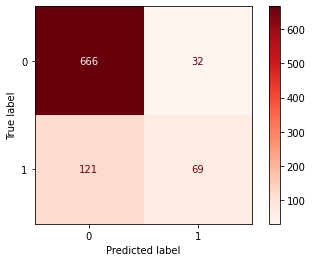

In [754]:
logreg.fit(X_train, y_train)

lr_train = logreg.predict(X_train)
lr_test = logreg.predict(X_test)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap='Reds'))

### SVM

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1628
           1       0.75      0.45      0.57       443

    accuracy                           0.85      2071
   macro avg       0.81      0.71      0.74      2071
weighted avg       0.84      0.85      0.84      2071

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       698
           1       0.64      0.39      0.48       190

    accuracy                           0.82       888
   macro avg       0.74      0.66      0.69       888
weighted avg       0.80      0.82      0.81       888

Confusion Matrix      : 


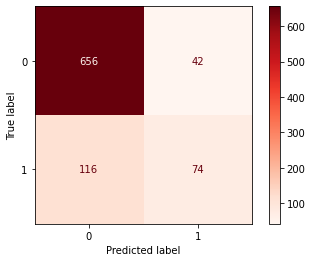

In [755]:
svc.fit(X_train, y_train)

svc_train = svc.predict(X_train)
svc_test = svc.predict(X_test)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, cmap='Reds'))

### DecissionTree

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1628
           1       0.95      0.53      0.68       443

    accuracy                           0.89      2071
   macro avg       0.92      0.76      0.81      2071
weighted avg       0.90      0.89      0.88      2071

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       698
           1       0.61      0.34      0.44       190

    accuracy                           0.81       888
   macro avg       0.72      0.64      0.66       888
weighted avg       0.79      0.81      0.79       888

Confusion Matrix      : 


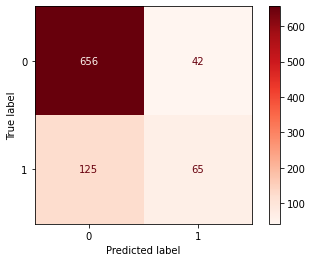

In [756]:
dtc.fit(X_train, y_train)

dtc_train = dtc.predict(X_train)
dtc_test = dtc.predict(X_test)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, cmap='Reds'))

### RandomForest

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1628
           1       0.90      0.57      0.69       443

    accuracy                           0.89      2071
   macro avg       0.89      0.77      0.81      2071
weighted avg       0.89      0.89      0.88      2071

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       698
           1       0.61      0.36      0.45       190

    accuracy                           0.81       888
   macro avg       0.73      0.65      0.67       888
weighted avg       0.79      0.81      0.79       888

Confusion Matrix      : 


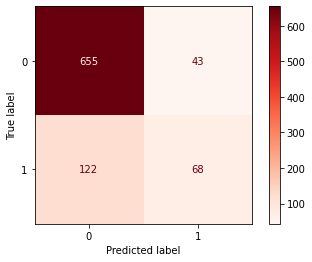

In [757]:
rfc.fit(X_train, y_train)

rfc_train = rfc.predict(X_train)
rfc_test = rfc.predict(X_test)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap='Reds'))

### KNN

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1628
           1       0.74      0.47      0.58       443

    accuracy                           0.85      2071
   macro avg       0.80      0.71      0.74      2071
weighted avg       0.84      0.85      0.84      2071

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       698
           1       0.57      0.35      0.43       190

    accuracy                           0.81       888
   macro avg       0.71      0.64      0.66       888
weighted avg       0.78      0.81      0.79       888

Confusion Matrix      : 


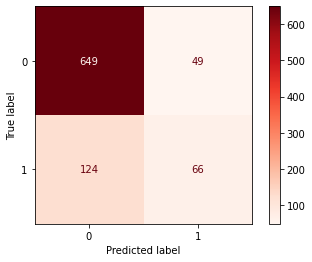

In [758]:
knn.fit(X_train, y_train)

knn_train = knn.predict(X_train)
knn_test = knn.predict(X_test)

print(classification_report(y_train, knn_train))
print(classification_report(y_test, knn_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Reds'))

### NaiveBayes

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1628
           1       0.57      0.51      0.54       443

    accuracy                           0.81      2071
   macro avg       0.72      0.70      0.71      2071
weighted avg       0.81      0.81      0.81      2071

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       698
           1       0.57      0.49      0.53       190

    accuracy                           0.81       888
   macro avg       0.72      0.70      0.71       888
weighted avg       0.80      0.81      0.81       888

Confusion Matrix      : 


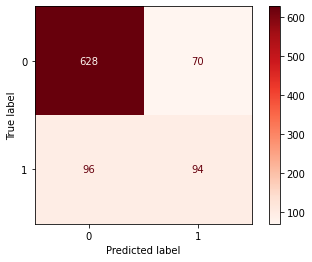

In [759]:
gnb.fit(X_train, y_train)

gnb_train = gnb.predict(X_train)
gnb_test = gnb.predict(X_test)

print(classification_report(y_train, gnb_train))
print(classification_report(y_test, gnb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, cmap='Reds'))

### AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1628
           1       0.74      0.42      0.53       443

    accuracy                           0.84      2071
   macro avg       0.80      0.69      0.72      2071
weighted avg       0.83      0.84      0.83      2071

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       698
           1       0.67      0.38      0.49       190

    accuracy                           0.83       888
   macro avg       0.76      0.67      0.69       888
weighted avg       0.81      0.83      0.81       888

Confusion Matrix      : 


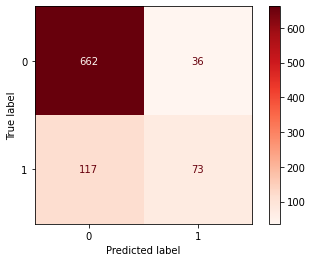

In [760]:
adb.fit(X_train, y_train)

adb_train = adb.predict(X_train)
adb_test = adb.predict(X_test)

print(classification_report(y_train, adb_train))
print(classification_report(y_test, adb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adb, X_test, y_test, cmap='Reds'))

### BaggingClasifier

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1628
           1       0.88      0.56      0.68       443

    accuracy                           0.89      2071
   macro avg       0.88      0.77      0.81      2071
weighted avg       0.89      0.89      0.88      2071

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       698
           1       0.56      0.36      0.44       190

    accuracy                           0.80       888
   macro avg       0.70      0.64      0.66       888
weighted avg       0.78      0.80      0.79       888

Confusion Matrix      : 


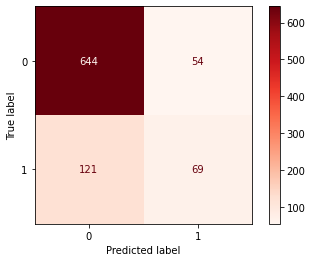

In [761]:
bag_clf.fit(X_train, y_train)

bag_clf_train = bag_clf.predict(X_train)
bag_clf_test = bag_clf.predict(X_test)

print(classification_report(y_train, bag_clf_train))
print(classification_report(y_test, bag_clf_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(bag_clf, X_test, y_test, cmap='Reds'))

Karena urgency target yaitu default_pay 1 = wajib bayar, dan 0=tidak wajib bayar, maka yang menjadi perhatian adalah nilai 1. Dimana nilai prediksi 1 nya harus lebih tinggi daripada prediksi nilai 0. 

Kita akan menggunakan nilai recall, yaitu nilai pengukuran model bilamana kita menitikberatkan pada nilai false negative yang harus rendah dan data imbalance. Recall menggambarkan jumlah data positif yang terprediksi positif.
nilai False Negative yg artinya prediksinya 0 padahal actualnya 1 harus dihindari atau bernilai lebih rendah. Jadi dari nilai recall kita lihat prediksi 1 nya harus tinggi.

Begitu juga dengan nilai dari confusion matrix nya, predict 0, actual 1 nya atau nilai false negative harus lebih rendah. 

Nilai recall dan confusion matrix yang didapatkan dari beberapa model sbb :
1. LogisticRegression:
- 0 : 0.95
- 1 : 0.36
- confusion_matrix = False Negative nya : 121/ 190*100 = 63.68 %
2. SVM
- 0 : 0.94
- 1 :0.39
- confusion_matrix = False Negative nya : 116/ 190*100 = 61.05 %
3. DecissionTree
- 0 : 0.94
- 1 : 0.35
- confusion_matrix = False Negative nya : 123/ 190*100 = 64.73 %
4. RandomForest
- 0 : 0.93
- 1 : 0.36
- confusion_matrix = False Negative nya : 122/ 190*100 = 64.21 %
5. KNN
- 0 : 0.93
- 1 : 0.35
- confusion_matrix = False Negative nya : 124/190*100 = 65.26 %
6. NaiveBayes
- 0 : 0.90
- 1 : 0.49
- confusion_matrix = False Negative nya : 96/190*100 = 50.52 %
7. AdaBoost
- 0 : 0.95
- 1 : 0.38
- confusion_matrix = False Negative nya : 117/190*100 = 61.57 %
Bagging
- 0 : 0.92
- 1 : 0.35
- confusion_matrix = False Negative nya : 123/190*100 = 64.73 %

Dari perhitungan sementara model yang paling bagus memprediksi nilai 1 adalah naive bayes dimana nilainya 0.49 dan confusion matrix nya juga 50.52 % lebih rendah dibanding model lain. Sejauh ini dapat kita katakan model kita masih tidak bagus performanya. Mari kita lihat melalui cross validation. 

## Cross Validation

untuk mengevaluasi kinerja model maka akan kita gunakan cross validation dengan menggunakna skoring accuracy untuk melihat sejauh mana model konsisten dilihat dari nilai mean nya yang paling tinggi dan nilai standar deviasi nya yg paling rendah dari masing-masing model yg diterapkan untuk selanjutnya dipilih best model. 

### LogisticRegression

In [762]:
# Cross Validation using `cross_val_score`

cv_logreg = cross_val_score(logreg,X_train, y_train, cv=3, scoring='accuracy')

print('LogisticRegression')
print('accuracy Score - All - Cross Validation  : ', cv_logreg)
print('accuracy Score - Mean - Cross Validation : ', cv_logreg.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_logreg.std())
print('accuracy Score - Range of Test-Set       : ', (cv_logreg.mean()-cv_logreg.std()) , '-', (cv_logreg.mean()+cv_logreg.std()))

LogisticRegression
accuracy Score - All - Cross Validation  :  [0.84659913 0.83188406 0.84927536]
accuracy Score - Mean - Cross Validation :  0.8425861839943511
accuracy Score - Std - Cross Validation  :  0.007646008922086543
accuracy Score - Range of Test-Set       :  0.8349401750722646 - 0.8502321929164377


### SVM

In [763]:
cv_svc = cross_val_score(svc,X_train, y_train, cv=3, scoring='accuracy')

print('SVM')
print('accuracy Score - All - Cross Validation  : ', cv_svc)
print('accuracy Score - Mean - Cross Validation : ', cv_svc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_svc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_svc.mean()-cv_svc.std()) , '-', (cv_svc.mean()+cv_svc.std()))

SVM
accuracy Score - All - Cross Validation  :  [0.84659913 0.83333333 0.83478261]
accuracy Score - Mean - Cross Validation :  0.8382383579073945
accuracy Score - Std - Cross Validation  :  0.005941492713226881
accuracy Score - Range of Test-Set       :  0.8322968651941677 - 0.8441798506206214


### Decission Tree

In [764]:
cv_dtc = cross_val_score(dtc,X_train, y_train, cv=3, scoring='accuracy')

print('DecissionTree')
print('accuracy Score - All - Cross Validation  : ', cv_dtc)
print('accuracy Score - Mean - Cross Validation : ', cv_dtc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_dtc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_dtc.mean()-cv_dtc.std()) , '-', (cv_dtc.mean()+cv_dtc.std()))

DecissionTree
accuracy Score - All - Cross Validation  :  [0.81620839 0.79855072 0.81304348]
accuracy Score - Mean - Cross Validation :  0.8092675321769892
accuracy Score - Std - Cross Validation  :  0.007687290168548371
accuracy Score - Range of Test-Set       :  0.8015802420084408 - 0.8169548223455376


### RandomForest

In [765]:
cv_rfc = cross_val_score(rfc,X_train, y_train, cv=3, scoring='accuracy')

print('RandomForest')
print('accuracy Score - All - Cross Validation  : ', cv_rfc)
print('accuracy Score - Mean - Cross Validation : ', cv_rfc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_rfc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_rfc.mean()-cv_rfc.std()) , '-', (cv_rfc.mean()+cv_rfc.std()))

RandomForest
accuracy Score - All - Cross Validation  :  [0.81041968 0.8173913  0.81884058]
accuracy Score - Mean - Cross Validation :  0.8155505218929369
accuracy Score - Std - Cross Validation  :  0.0036759797961259176
accuracy Score - Range of Test-Set       :  0.811874542096811 - 0.8192265016890627


### KNN

In [766]:
cv_knn = cross_val_score(knn,X_train, y_train, cv=3, scoring='accuracy')

print('KNN')
print('accuracy Score - All - Cross Validation  : ', cv_knn)
print('accuracy Score - Mean - Cross Validation : ', cv_knn.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_knn.std())
print('accuracy Score - Range of Test-Set       : ', (cv_knn.mean()-cv_knn.std()) , '-', (cv_knn.mean()+cv_knn.std()))

KNN
accuracy Score - All - Cross Validation  :  [0.83212735 0.81014493 0.82608696]
accuracy Score - Mean - Cross Validation :  0.8227864119074085
accuracy Score - Std - Cross Validation  :  0.009272789537115541
accuracy Score - Range of Test-Set       :  0.813513622370293 - 0.832059201444524


### Naive Bayes

In [767]:
cv_gnb = cross_val_score(gnb,X_train, y_train, cv=3, scoring='accuracy')

print('NaiveBayes')
print('accuracy Score - All - Cross Validation  : ', cv_gnb)
print('accuracy Score - Mean - Cross Validation : ', cv_gnb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_gnb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_gnb.mean()-cv_gnb.std()) , '-', (cv_gnb.mean()+cv_gnb.std()))

NaiveBayes
accuracy Score - All - Cross Validation  :  [0.81765557 0.8057971  0.80289855]
accuracy Score - Mean - Cross Validation :  0.8087837412697415
accuracy Score - Std - Cross Validation  :  0.006383960609862192
accuracy Score - Range of Test-Set       :  0.8023997806598793 - 0.8151677018796037


### AdaboostClassifier

In [768]:
cv_adb = cross_val_score(adb,X_train, y_train, cv=3, scoring='accuracy')

print('AdaBoostClassifier')
print('accuracy Score - All - Cross Validation  : ', cv_adb)
print('accuracy Score - Mean - Cross Validation : ', cv_adb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_adb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_adb.mean()-cv_adb.std()) , '-', (cv_adb.mean()+cv_adb.std()))

AdaBoostClassifier
accuracy Score - All - Cross Validation  :  [0.84515195 0.83768116 0.84202899]
accuracy Score - Mean - Cross Validation :  0.8416206995392801
accuracy Score - Std - Cross Validation  :  0.0030635725147771953
accuracy Score - Range of Test-Set       :  0.8385571270245029 - 0.8446842720540573


### BaggingClassifier

In [769]:
cv_bag_clf = cross_val_score(bag_clf,X_train, y_train, cv=3, scoring='accuracy')

print('BaggingClassifier')
print('accuracy Score - All - Cross Validation  : ', cv_bag_clf)
print('accuracy Score - Mean - Cross Validation : ', cv_bag_clf.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_bag_clf.std())
print('accuracy Score - Range of Test-Set       : ', (cv_bag_clf.mean()-cv_bag_clf.std()) , '-', (cv_bag_clf.mean()+cv_bag_clf.std()))

BaggingClassifier
accuracy Score - All - Cross Validation  :  [0.80752533 0.81014493 0.8115942 ]
accuracy Score - Mean - Cross Validation :  0.8097548186832778
accuracy Score - Std - Cross Validation  :  0.0016838604999446479
accuracy Score - Range of Test-Set       :  0.8080709581833332 - 0.8114386791832224


### Best Score 

In [770]:
crossval = [cv_logreg,cv_svc,cv_dtc,cv_rfc, cv_knn, cv_gnb, cv_adb, cv_bag_clf]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest','KNN', 'Naive Bayes' ,'AdaBoost','Bagging']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Logistic Regression,0.843,0.008
1,AdaBoost,0.842,0.003
2,SVM,0.838,0.006
3,KNN,0.823,0.009
4,Random Forest,0.816,0.004
5,Bagging,0.810,0.002
6,Decision Tree,0.809,0.008
7,Naive Bayes,0.809,0.006


Dari hasil cross validation didapatkan hasil bahwa Model LogisticRegression mendapatkan peringkat pertama dimana nilai Mean nya 0.843 dan std nya 0.008. Jika dilihat dari Mean nya saja maka nilai LogisticRegression lebih bagus, namun jika ditinjau dari std nya juga Model kedua yaitu Adaboost lebih unggul dengan std 0.003. Maka dari itu akan kita coba untuk menerapkan hyperparameter pada kedua model ini untuk mencari lagi model terbaiknya yang mana. 

## Hyperparameter Tuning using GridSearchCV


Berdasarkan perbandingan nilai dari best model diatas, model logistic regression lebih bagus dilihat dari Mean nya. diurutan kedua ada Adaboost dengan nilai mean berbeda sedikit namun nilai std nya lebih kecil. Maka dari itu kita akan coba membandingkan keduan nya dengan menggunakan hyperparameter tuning. 

### Logistic Regression 

Mendefinisikan parameter parameter yang akan digunakan dalam pemilihan gridsearch

In [771]:
param_grid = [{'penalty' : ['l2'],
               'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
               'max_iter' : [100, 200,300,400]}]

Menerapkan fungsi param_grid ke dalam gridseacrhcv dengan menggunakna scoring recall, seperti sudah dijelaskan sebelumnya kita akan menggunakan nilai recall. 

In [772]:
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=3,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'max_iter': [100, 200, 300, 400], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='recall')

Mnecari best parameter dan score nya 

In [773]:
print('best params:', grid_search.best_params_)
print('best score:', grid_search.best_score_)

best params: {'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
best score: 0.3994606851749709


Didapatkan bahwa best parameternya adalah : 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', atau dalam artian nilai nya sama dengan seperti default / baseline dari Logreg. 

In [774]:
lr = grid_search.best_estimator_
print(lr)

LogisticRegression()


IMplementasi pada data train dan test menggunakna best parameter

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1628
           1       0.73      0.40      0.51       443

    accuracy                           0.84      2071
   macro avg       0.79      0.68      0.71      2071
weighted avg       0.83      0.84      0.82      2071

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       698
           1       0.68      0.36      0.47       190

    accuracy                           0.83       888
   macro avg       0.76      0.66      0.69       888
weighted avg       0.81      0.83      0.81       888

Confusion Matrix      : 


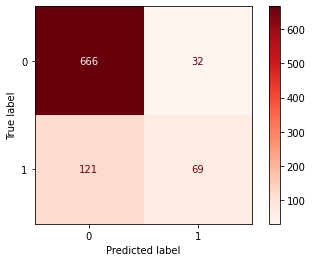

In [775]:
lr.fit(X_train, y_train)

lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Reds'))

Setelah dilakukan hyperparameter tuning pada Logreg didapatkan best parameternya bernilai default. Oleh karena itu hasil yang telah diterapkan pada data test nya sama dengan pada saat training model sebelumnya, Nilai recall dan confusion nya sama. lanjut kita akan hitung bagaimana dengan adaboost.

### AdaBoostClassifier

Mendefinisikan parameter yang digunakan,

In [776]:
param_2 = [{'base_estimator' :[DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=2)],
            'algorithm' :['SAMME','SAMME.R'],
            'n_estimators' :[10,20,30],
            'random_state': [10,20,30]}]

Memasukan fungsi param_2 kedalam gridsearchcv

In [777]:
grid_search2 = GridSearchCV(adb, param_grid=param_2, cv=3,
                           scoring='recall',
                           return_train_score=True)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'base_estimator': [DecisionTreeClassifier(criterion='entropy',
                                                                    max_depth=2,
                                                                    splitter='random')],
                          'n_estimators': [10, 20, 30],
                          'random_state': [10, 20, 30]}],
             return_train_score=True, scoring='recall')

Memilih best parameter dan scorenya 

In [778]:
print('best params:', grid_search2.best_params_)
print('best score:', grid_search2.best_score_)

best params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=2, splitter='random'), 'n_estimators': 20, 'random_state': 10}
best score: 0.41300484157627015


Didapatkan hasil best parameter nya yaitu 'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=2, splitter='random'), 'n_estimators': 20, 'random_state': 10. 

In [779]:
ad = grid_search2.best_estimator_
print(ad)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=2,
                                                         splitter='random'),
                   n_estimators=20, random_state=10)


Terapkan pada pada train dan test

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1628
           1       0.72      0.42      0.53       443

    accuracy                           0.84      2071
   macro avg       0.79      0.69      0.72      2071
weighted avg       0.83      0.84      0.82      2071

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       698
           1       0.70      0.42      0.52       190

    accuracy                           0.84       888
   macro avg       0.78      0.69      0.71       888
weighted avg       0.82      0.84      0.82       888

Confusion Matrix      : 


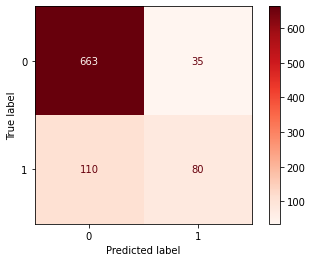

In [780]:
ad.fit(X_train, y_train)

ad_train = ad.predict(X_train)
ad_test = ad.predict(X_test)

print(classification_report(y_train, ad_train))
print(classification_report(y_test, ad_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ad, X_test, y_test, cmap='Reds'))

Setelah dilakukan hyperparameter tuning pada Adaboost didapatkan nilai recallnya pada nilai 1 naik dari 0.38 menjadi 0.42 dan untuk confusion matrix nya nilai false negative nya turun dari 120 menjadi 110. Maka dari itu yang akan kita gunakan sebagai best model adalah AdaBoostClassifier. Selanjutnya akan kita terapkan pada Model INference.

## Model Inference

memanggil data inference yang sudah disiapkan sebelumnya dengan nama data_inf

In [781]:
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,140000,1,2,1,48,0,0,0,0,0,0,41241,42548,44552,46503,48418,49277,1996,3000,3000,3000,1790,1965,0
1,50000,0,2,1,32,1,0,0,0,0,0,-11545,-1935,7321,2850,6340,3110,10000,10000,7867,6340,3000,2218,0
2,10000,1,1,2,24,0,0,0,0,0,0,6709,7895,8751,8925,9111,9360,1300,1146,320,330,400,1000,0
3,210000,1,2,1,37,0,0,0,0,0,0,22908,32513,6192,2885,8419,2810,32513,9,8,8444,3118,0,1
4,70000,1,1,2,25,0,0,2,2,2,0,37017,39980,39063,41592,39101,40310,3900,0,3500,0,2000,1813,1


Capping outlier

In [782]:
inference = wins.transform(data_inf)
inference

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,140000.0,1,2,1,48,0,0,0,0,0,0,41241,42548,44552,46503,48418,49277,1996,3000,3000,3000,1790,1965,0
1,50000.0,0,2,1,32,1,0,0,0,0,0,-11545,-1935,7321,2850,6340,3110,10000,10000,7867,6340,3000,2218,0
2,10000.0,1,1,2,24,0,0,0,0,0,0,6709,7895,8751,8925,9111,9360,1300,1146,320,330,400,1000,0
3,210000.0,1,2,1,37,0,0,0,0,0,0,22908,32513,6192,2885,8419,2810,32513,9,8,8444,3118,0,1
4,70000.0,1,1,2,25,0,0,2,2,2,0,37017,39980,39063,41592,39101,40310,3900,0,3500,0,2000,1813,1


Menggabungkan data yg sudah di capping dan reset index

In [783]:
inf_mod = pd.concat([inference.reset_index(drop=True)], axis=1)
inf_mod

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,140000.0,1,2,1,48,0,0,0,0,0,0,41241,42548,44552,46503,48418,49277,1996,3000,3000,3000,1790,1965,0
1,50000.0,0,2,1,32,1,0,0,0,0,0,-11545,-1935,7321,2850,6340,3110,10000,10000,7867,6340,3000,2218,0
2,10000.0,1,1,2,24,0,0,0,0,0,0,6709,7895,8751,8925,9111,9360,1300,1146,320,330,400,1000,0
3,210000.0,1,2,1,37,0,0,0,0,0,0,22908,32513,6192,2885,8419,2810,32513,9,8,8444,3118,0,1
4,70000.0,1,1,2,25,0,0,2,2,2,0,37017,39980,39063,41592,39101,40310,3900,0,3500,0,2000,1813,1


Feature selection 

In [784]:
inf_model = inf_mod[['limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_pay']]
inf_model.head(3)

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_pay
0,140000.0,0,0,0,0,0,0,0
1,50000.0,1,0,0,0,0,0,0
2,10000.0,0,0,0,0,0,0,0


Scaling pada data inference. 

In [785]:
num_scaled_testing = pd.DataFrame(scaler.transform(inf_model[num_col_scalling]))
num_scaled_testing.columns = num_col_scalling

inf_model.drop(num_col_scalling, axis=1, inplace=True)
inf_model = pd.concat([inf_model, num_scaled_testing], axis=1)

inf_model = inf_model[['limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_pay']]
inf_model

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_pay
0,0.265306,0,0,0,0,0,0,0
1,0.081633,1,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0
3,0.408163,0,0,0,0,0,0,1
4,0.122449,0,0,2,2,2,0,1


In [786]:
X_inf = inf_model.drop('default_pay',axis=1).copy()

In [787]:
X_inf

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.265306,0,0,0,0,0,0
1,0.081633,1,0,0,0,0,0
2,0.000000,0,0,0,0,0,0
3,0.408163,0,0,0,0,0,0
4,0.122449,0,0,2,2,2,0


Implementasi pada model baseline menggunakan AdaBoost Classifier

In [788]:
adb.predict(X_inf)

array([0, 0, 0, 0, 0])

Implementasi pada model dengan best parameter pada model Adaboost Classifier.

In [789]:
ad.predict(X_inf)

array([0, 0, 0, 0, 0])

Disini hasil dari inference model nya memprediksi dengan tidak baik, data actual nya adalah [0,0,0,1,1]. Namun model memprediksi [0,0,0,0,0]. hal ini karena data imbalance. model hanya terlatih dengan nilai 0, namun berbeda dengan 1.  Jika data inference nya bernilai 1 kemungkinan model tidak bisa memprediksi dengan baik karena nilai recall nya sendiri pada saat implementasi di model dengan best parameter hanya 0,42. 

## Conceptual Problems

Jawab pertanyaan berikut:

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!


Jawab :

1. Parameter criterion adalah fungsi untuk mengukur kualitas split atau pemisahan data. Karena konsep decisiion tree adalah partisi, maka sangat penting dalam menentukan bagaimana dan kapan membaginya. Ada beberapa konsep yang dijelaskan sebagai berikut:

- Entropy digunakan untuk mengukur ketidakmurnian atau ketidakpastian dalam atribut tertentu. Entropy menentukan randomness dalam data,semakin kecil nilai entropy, semakin baik. Nilai entropi bervariasi antara 0 dan 1.Entropy menggunakan konsep probabilitas dalam menentukan besar entropy suatu kejadian.

2. Pruning digunakan ketika kita menemukan masalah overvitting pada algoritma. Masalah overfitting dipertimbangkan ketika algoritma terus masuk lebih dalam dan lebih dalam untuk mengurangi error set pelatihan tetapi menghasilkan error set test yang meningkat. Jadi, akurasi prediksi untuk model kami turun.
Dua pendekatan yang dapat digunakan untuk menghindari overfitting adalah sebagai berikut:
- Pre-Pruning
Dalam Pre-pruning, kita menghentikan pembangunan tree sedikit lebih awal. Kita memilih untuk tidak membagi node jika ukuran terbaiknya di bawah nilai ambang batas. Tetapi sulit untuk memilih titik pemberhentian yang tepat.
- Post-Pruning
Dalam Post-pruning, kita mencoba masuk lebih dalam dan lebih dalam lagi di tree untuk membangun tree yang lengkap. Jika tree menunjukkan masalah overfitting maka pruning dilakukan sebagai langkah post-pruning.



3. Cara memilih K yang optimal pada KKN 
- tidak ada metode statistik yang khusus untuk menemukan nilai K terbaik
- menentukan nilai K berdasarkan asumsi pribadi
- jika target berjumlah genap maka sebaiknya nilai K-nya ganjil, sebaliknya jika target berjumlah ganjil maka sebaiknya nilai K-nya genap, agar ada perbandingan yg lebih banyak jumlahnya.
- Membuat perbandingan antara tingkat kesalahan dna nilai K yang digunakan. Kemudian pilih nilai K berdasarkan tingkat kesalahan minimum.


4. Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi. Model atau algoritma dilatih oleh subset pembelajaran dan divalidasi oleh subset evaluasi.
Jenis CV :
- K-Fold
- Leave One Out (LOOCV)
- Leave P Out (LPOCV)
- Stratified Cross Validation
Penggunaan CV :
- Memperkirakan eror pada model yang diberikan 
- Memilih best model 
- Memilih best parameter 

5. Accuracy, Precision, Recall, F1 Score
- Accuracy adalah nilai pengukuran model bilamana datanya balance. Akurasi mengukur seberapa banyak data yang benar diprediksi dibandingkan dengan total data.
- Precision adalah nilai pengukuran model bilamana kita menitikberatkan pada nilai false positive yang harus rendah. Dan data imbalance. Presisi menggambarkan seberapa besar jumlah prediksi yang benar. 
- Recall adalah nilai pengukuran model bilamana kita menitikberatkan pada nilai false negative yang harus rendah dan data imbalance. Recall menggambarkan jumlah data positif yang terprediksi positif.
- F1score adalah nilai pengukuran model bilamana kita tidak bisa menentukan konteks pada precision dan recall dan nilai keduanya seimbang, maka kita gunakan f1score dimana nilainya adalah rata-rata dari precision dan recall. 




## Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Pada tahap EDA jika dilihat dari presentase banyakya data pada default_pay, bisa dikatakan data imbalance.karena proporsinya nilai 0 lebih banyak yaitu sebesar 78.58 % dari pada nilai 1 sejumlah 21.42 %. 
2. Setelah dilakukan pemodelan dengan menggunakan LogisticRegression,SVM,DecissionTree,RandomForest,KNN,NaiveBayes,AdaBoost,Bagging dengan default parameter, dan diuji menggunakan cross validation yang memfokuskan pada nilai recall dengan melihat nilai mean yg tinggi dan std yg rendah didapatkan best model yaitu Logreg dan Adaboost. 
3. Hyperparameter dilakukan di kedua model tsb dan menghasilkan best model yaitu Adaboost. Setelah implementasi pada data testing didapatkan nilai recall sebesar 0.42 di presiksi nilai 1. Nilai ini masih belum cukup untuk dikatakan baik.
3. Dapat dikatakan Model ini tidak dapat digunakan sebagai base untuk prediksi klasifikasi karena hasilnya tidak baik terbukti pada saat model inference hasilnya model memprediksi dengan tidak baik, data actual nya adalah [0,0,0,1,1], Namun model memprediksi [0,0,0,0,0]
4. Kekurangan dari model ini dari data awal nya karena data imbalance, lebih banyak data 0 dibanding 1. sehingga model hanya terlatih dengan nilai 0, namun tidak dengan 1.  Jika data inference nya bernilai 1 kemungkinan model tidak bisa memprediksi dengan baik karena nilai recall nya sendiri pada saat implementasi di model dengan best parameter hanya 0,42 untuk memprediksi nilai 1.
5. Terdapat kemungkinan juga pada saat pemilihan feature selection terdapat feature yang kurang tepat yang digunakan di dalam model. 
